In [1]:
import os
import random

import numpy as np
from skimage import exposure

import matplotlib.pyplot as plt

In [2]:
s2_data_folder_path = 's2_data'

random_file = random.choice([_ for _ in os.listdir(s2_data_folder_path) if _.endswith('.npy')])
random_file_path = os.path.join(s2_data_folder_path, random_file)
random_file_data = np.load(random_file_path)

In [3]:
def composition(bands_13):
    band1 = bands_13[1,:,:]
    band2 = bands_13[2,:,:]
    band3 = bands_13[3,:,:]
    im_comp = np.dstack([band3/band3.max(), band2/band2.max(), band1/band1.max()])
    for i in range(3):
        v_min, v_max = np.percentile(im_comp[:,:,i], (1,98))
        im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i], in_range = (v_min, v_max))
    return im_comp

Industrial_401.npy


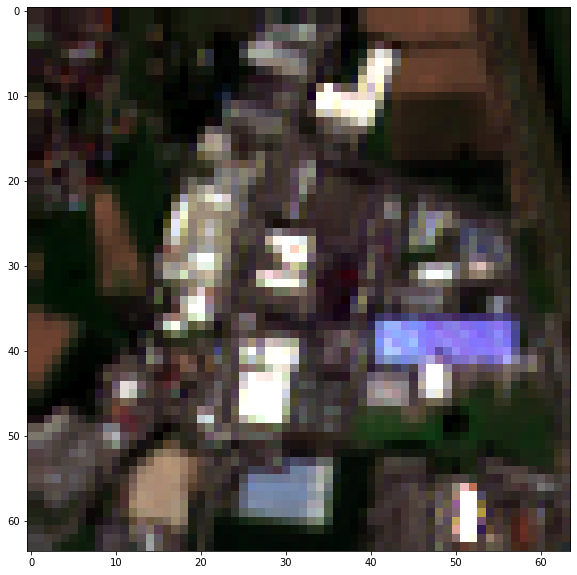

In [4]:
print(random_file)
im_comp = composition(random_file_data)
plt.figure(figsize=(20,10))
plt.imshow(im_comp)